In [1]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlrose_hiive

In [2]:
result_dir = "results"
os.makedirs(result_dir, exist_ok=True)

In [3]:
random_seed = 100
problem_size_list = [50, 100, 200, 400]
iteration_list = [100, 500, 1000, 2000]
restart_list = [4, 8, 16]
max_attempts = 100
sa_temp_list = [0.1, 0.5, 0.75, 1.0, 2.0, 5.0]
sa_decay_schedule = {"ExpDecay": mlrose_hiive.ExpDecay(), "ArithDecay": mlrose_hiive.ArithDecay(), "GeomDecay": mlrose_hiive.GeomDecay()}
ga_population_size_list = [10, 50, 200, 800, 3200]
ga_mutation_prob_list = [0.1, 0.2, 0.5]

mimic_population_size_list = [10, 50, 100, 200, 400]
mimic_keep_pct_list = [0.1, 0.2, 0.3, 0.4, 0.5]

In [4]:
problem_name = "ContinuousPeaks"

## 1. Random Hill Climbing

In [5]:
rhc_df = None

for problem_size in problem_size_list:
    print(f"problem_size: {problem_size}")
    
    problem = mlrose_hiive.FlipFlopGenerator.generate(seed=random_seed, size=problem_size)
    
    start_time = time.time()
    rhc_runner = mlrose_hiive.RHCRunner(problem=problem, 
                                        experiment_name="ContinuousPeaks_RHC", 
                                        output_directory=None,
                                        seed=random_seed, 
                                        iteration_list=iteration_list, 
                                        restart_list=restart_list,
                                        max_attempts=max_attempts, 
                                        generate_curves=True
                                        )
    rhc_run_stats, rhc_run_curves = rhc_runner.run()
    runtime = time.time() - start_time
    
    rhc_run_stats['Algorithm'] = "RHC"
    rhc_run_stats['Problem_size'] = problem_size
    rhc_run_stats['Runtime'] = runtime

    
    if rhc_df is None:
        rhc_df = rhc_run_stats
    else:
        rhc_df = pd.concat([rhc_df, rhc_run_stats], ignore_index=True)
    
rhc_df.to_csv(os.path.join(result_dir, problem_name + "_" + "RHC"+".csv")) 

problem_size: 50
problem_size: 100
problem_size: 200
problem_size: 400


In [6]:
rhc_df.head()

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart,Algorithm,Problem_size,Runtime
0,0,19.0,0,0.000158,"[0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",4,2000,0,RHC,50,2.272625
1,100,40.0,111,0.009756,"[1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...",4,2000,0,RHC,50,2.272625
2,500,42.0,232,0.025665,"[1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...",4,2000,0,RHC,50,2.272625
3,1000,42.0,232,0.025665,"[1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...",4,2000,0,RHC,50,2.272625
4,2000,42.0,232,0.025665,"[1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...",4,2000,0,RHC,50,2.272625


In [7]:
rhc_df.columns

Index(['Iteration', 'Fitness', 'FEvals', 'Time', 'State', 'Restarts',
       'max_iters', 'current_restart', 'Algorithm', 'Problem_size', 'Runtime'],
      dtype='object')

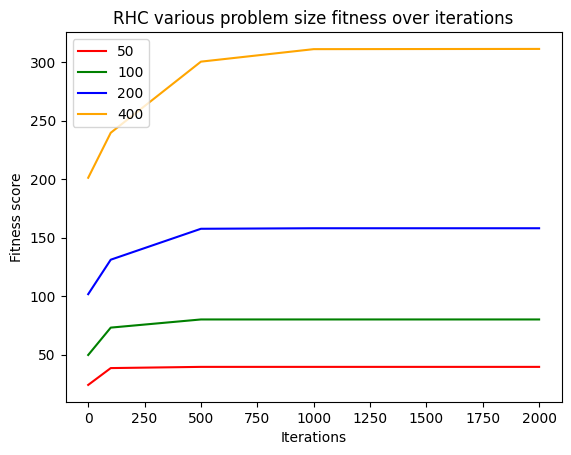

In [30]:
plot_df = rhc_df[['Problem_size', 'Iteration', 'Fitness']].groupby(['Problem_size', 'Iteration']).mean().reset_index()
for problem_size, color in zip(problem_size_list, ['r', 'g', 'b', 'orange']):
    plt.plot(plot_df[plot_df['Problem_size']==problem_size]['Iteration'], plot_df[plot_df['Problem_size']==problem_size]['Fitness'], color, label=str(problem_size))

plt.xlabel("Iterations")
plt.ylabel("Fitness score")
plt.title('RHC various problem size fitness over iterations')
plt.legend()
plt.show()

## 2. Simulated Annealing

In [9]:
sa_df = None

for problem_size in problem_size_list:
    print(f"problem_size: {problem_size}")
    
    problem = mlrose_hiive.FlipFlopGenerator.generate(seed=random_seed, size=problem_size)
    
    start_time = time.time()
    sa_runner = mlrose_hiive.SARunner(problem=problem,
              experiment_name='ContinuousPeaks_SA',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=random_seed,
              iteration_list=iteration_list,
              max_attempts=max_attempts,
              temperature_list=sa_temp_list,
              decay_list=[mlrose_hiive.GeomDecay, mlrose_hiive.ArithDecay, mlrose_hiive.ExpDecay],
              generate_curves=True)

    sa_run_stats, sa_run_curves = sa_runner.run()
    runtime = time.time() - start_time
    
    sa_run_stats['Algorithm'] = "SA"
    sa_run_stats['Problem_size'] = problem_size
    sa_run_stats['Runtime'] = runtime

    if sa_df is None:
        sa_df = sa_run_stats
    else:
        sa_df = pd.concat([sa_df, sa_run_stats], ignore_index=True)
    
sa_df.to_csv(os.path.join(result_dir, problem_name + "_" + "SA"+".csv")) 

problem_size: 50
problem_size: 100
problem_size: 200
problem_size: 400


In [10]:
sa_df

,Iteration,Fitness,FEvals,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters,schedule_exp_const,Algorithm,Problem_size,Runtime
0,0,19.0,0,0.000073,"[0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",geometric,0.1,0.99,0.001,0.100000,0.1,2000,NaN,SA,50,8.638677
1,100,38.0,142,0.006477,"[1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, ...",geometric,0.1,0.99,0.001,0.099993,0.1,2000,NaN,SA,50,8.638677
2,500,44.0,669,0.049959,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...",geometric,0.1,0.99,0.001,0.099950,0.1,2000,NaN,SA,50,8.638677
3,1000,46.0,1235,0.153519,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...",geometric,0.1,0.99,0.001,0.099846,0.1,2000,NaN,SA,50,8.638677
4,2000,48.0,1736,0.301666,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...",geometric,0.1,0.99,0.001,0.099697,0.1,2000,NaN,SA,50,8.638677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0,211.0,0,0.000295,"[0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",exponential,5.0,NaN,0.001,4.999993,5.0,2000,0.005,SA,400,15.660895
356,100,211.0,187,0.052205,"[0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, ...",exponential,5.0,NaN,0.001,4.998695,5.0,2000,0.005,SA,400,15.660895
357,500,278.0,872,0.187631,"[1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, ...",exponential,5.0,NaN,0.001,4.995311,5.0,2000,0.005,SA,400,15.660895
358,1000,323.0,1581,0.385810,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, ...",exponential,5.0,NaN,0.001,4.990364,5.0,2000,0.005,SA,400,15.660895


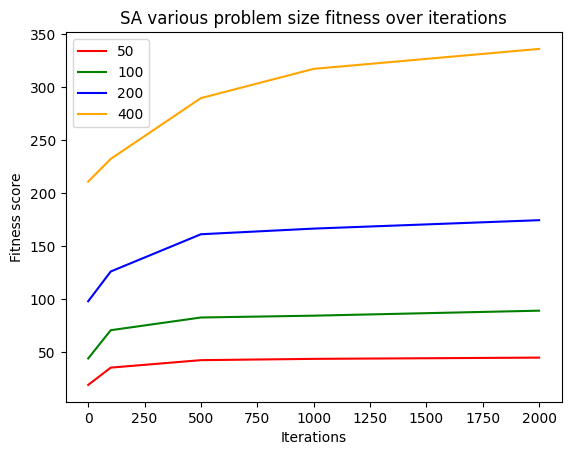

In [31]:
plot_df = sa_df[['Problem_size', 'Iteration', 'Fitness']].groupby(['Problem_size', 'Iteration']).mean().reset_index()
for problem_size, color in zip(problem_size_list, ['r', 'g', 'b', 'orange']):
    plt.plot(plot_df[plot_df['Problem_size']==problem_size]['Iteration'], plot_df[plot_df['Problem_size']==problem_size]['Fitness'], color, label=str(problem_size))

plt.xlabel("Iterations")
plt.ylabel("Fitness score")
plt.title('SA various problem size fitness over iterations')
plt.legend()
plt.show()

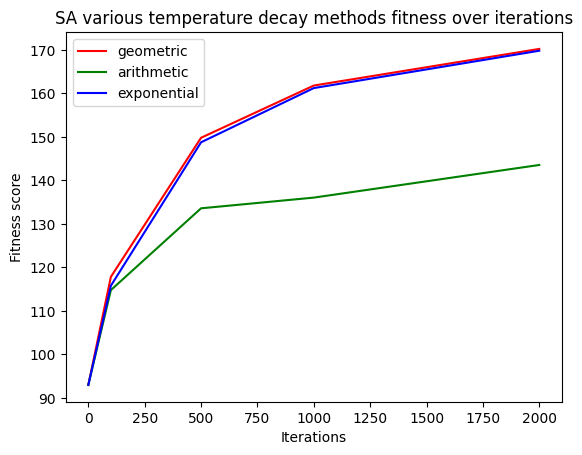

In [32]:
plot_df = sa_df[['schedule_type', 'Iteration', 'Fitness']].groupby(['schedule_type', 'Iteration']).mean().reset_index()
for schedule_type, color in zip(sa_df['schedule_type'].unique(), ['r', 'g', 'b']):
    plt.plot(plot_df[plot_df['schedule_type']==schedule_type]['Iteration'], plot_df[plot_df['schedule_type']==schedule_type]['Fitness'], color, label=str(schedule_type))

plt.xlabel("Iterations")
plt.ylabel("Fitness score")
plt.title('SA various temperature decay methods fitness over iterations')
plt.legend()
plt.show()

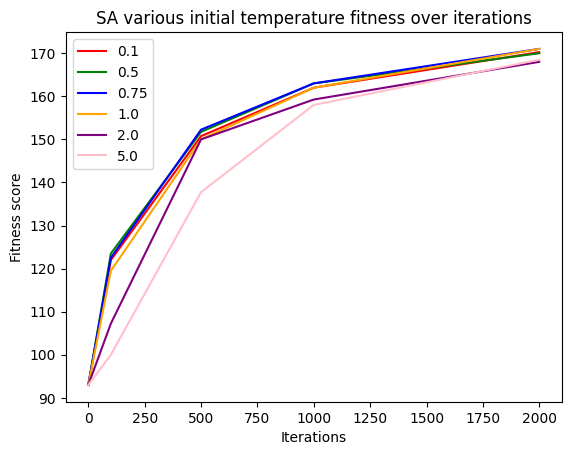

In [33]:
plot_df = sa_df[sa_df['schedule_type'] == 'exponential'][['schedule_init_temp', 'Iteration', 'Fitness']].groupby(['schedule_init_temp', 'Iteration']).mean().reset_index()
for start_temp, color in zip(sa_temp_list, ['r', 'g', 'b', 'orange', 'purple', 'pink']):
    plt.plot(plot_df[plot_df['schedule_init_temp']==start_temp]['Iteration'], plot_df[plot_df['schedule_init_temp']==start_temp]['Fitness'], color, label=str(start_temp))

plt.xlabel("Iterations")
plt.ylabel("Fitness score")
plt.title('SA various initial temperature fitness over iterations')
plt.legend()
plt.show()

## 3. Genetic Algorithm

In [14]:
ga_df = None

for problem_size in problem_size_list:
    print(f"problem_size: {problem_size}")
    
    problem = mlrose_hiive.FlipFlopGenerator.generate(seed=random_seed, size=problem_size)
    
    start_time = time.time()
    ga_runner = mlrose_hiive.GARunner(problem=problem,
              experiment_name='ContinuousPeaks_GA',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=random_seed,
              iteration_list=iteration_list,
              max_attempts=max_attempts,
              population_sizes=ga_population_size_list,
              mutation_rates=ga_mutation_prob_list,
              generate_curves=True)
    
    ga_run_stats, ga_run_curves = ga_runner.run()
    runtime = time.time() - start_time
    
    ga_run_stats['Algorithm'] = "GA"
    ga_run_stats['Problem_size'] = problem_size
    ga_run_stats['Runtime'] = runtime

    if ga_df is None:
        ga_df = ga_run_stats
    else:
        ga_df = pd.concat([ga_df, ga_run_stats], ignore_index=True)
    
ga_df.to_csv(os.path.join(result_dir, problem_name + "_" + "GA"+".csv")) 

problem_size: 50
problem_size: 100
problem_size: 200
problem_size: 400


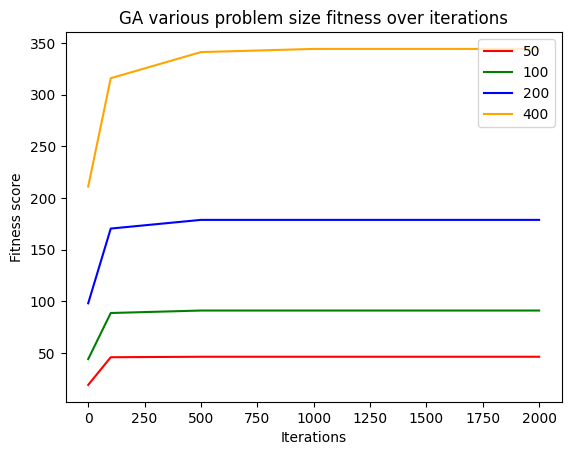

In [34]:
plot_df = ga_df[['Problem_size', 'Iteration', 'Fitness']].groupby(['Problem_size', 'Iteration']).mean().reset_index()
for problem_size, color in zip(problem_size_list, ['r', 'g', 'b', 'orange']):
    plt.plot(plot_df[plot_df['Problem_size']==problem_size]['Iteration'], plot_df[plot_df['Problem_size']==problem_size]['Fitness'], color, label=str(problem_size))

plt.xlabel("Iterations")
plt.ylabel("Fitness score")
plt.title('GA various problem size fitness over iterations')
plt.legend()
plt.show()

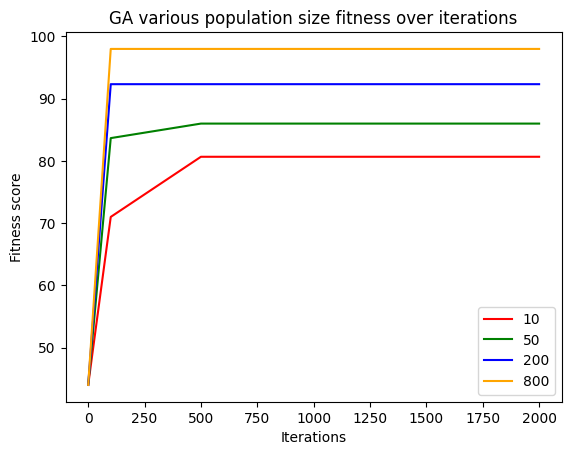

In [40]:
plot_df = ga_df[ga_df['Problem_size'] == 100][['Population Size', 'Iteration', 'Fitness']].groupby(['Population Size', 'Iteration']).mean().reset_index()
for population_size, color in zip(ga_population_size_list, ['r', 'g', 'b', 'orange']):
    plt.plot(plot_df[plot_df['Population Size']==population_size]['Iteration'], plot_df[plot_df['Population Size']==population_size]['Fitness'], color, label=str(population_size))

plt.xlabel("Iterations")
plt.ylabel("Fitness score")
plt.title('GA various population size fitness over iterations')
plt.legend()
plt.show()

In [17]:
## 4. MIMIC

In [18]:
mimic_df = None

for problem_size in problem_size_list:
    print(f"problem_size: {problem_size}")
    
    problem = mlrose_hiive.FlipFlopGenerator.generate(seed=random_seed, size=problem_size)
    
    start_time = time.time()
    ga_runner = mlrose_hiive.MIMICRunner(problem=problem,
              experiment_name='ContinuousPeaks_MIMIC',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=random_seed,
              iteration_list=iteration_list,
              max_attempts=max_attempts,
              population_sizes=mimic_population_size_list,
              keep_percent_list=mimic_keep_pct_list,
              use_fast_mimic=True,
              generate_curves=True)
    
    mimic_run_stats, mimic_run_curves = ga_runner.run()
    runtime = time.time() - start_time
    
    mimic_run_stats['Algorithm'] = "MIMIC"
    mimic_run_stats['Problem_size'] = problem_size
    mimic_run_stats['Runtime'] = runtime

    if mimic_df is None:
        mimic_df = mimic_run_stats
    else:
        mimic_df = pd.concat([mimic_df, mimic_run_stats], ignore_index=True)
    
mimic_df.to_csv(os.path.join(result_dir, problem_name + "_" + "MIMIC"+".csv")) 

problem_size: 50
problem_size: 100
problem_size: 200
problem_size: 400


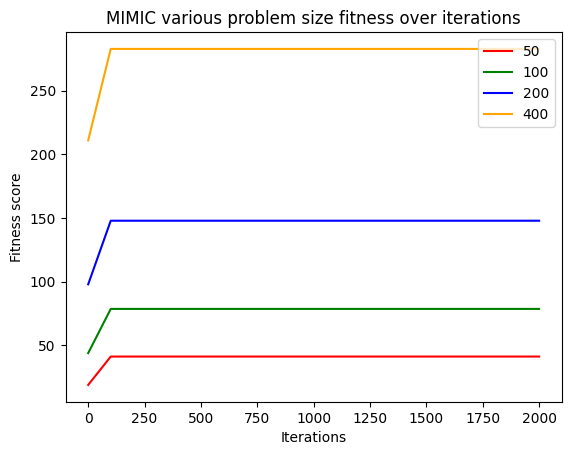

In [36]:
plot_df = mimic_df[['Problem_size', 'Iteration', 'Fitness']].groupby(['Problem_size', 'Iteration']).mean().reset_index()
for problem_size, color in zip(problem_size_list, ['r', 'g', 'b', 'orange']):
    plt.plot(plot_df[plot_df['Problem_size']==problem_size]['Iteration'], plot_df[plot_df['Problem_size']==problem_size]['Fitness'], color, label=str(problem_size))

plt.xlabel("Iterations")
plt.ylabel("Fitness score")
plt.title('MIMIC various problem size fitness over iterations')
plt.legend()
plt.show()

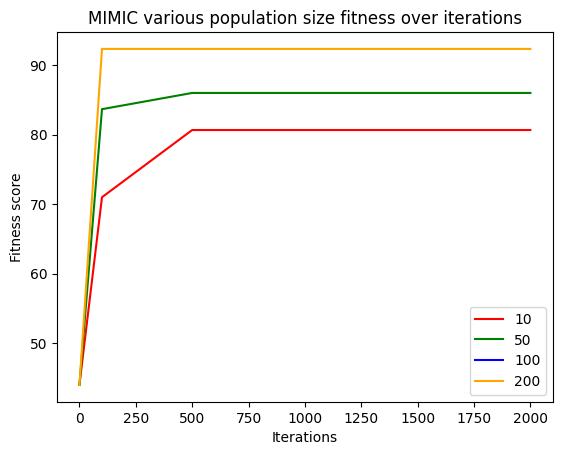

In [37]:
plot_df = ga_df[ga_df['Problem_size'] == 100][['Population Size', 'Iteration', 'Fitness']].groupby(['Population Size', 'Iteration']).mean().reset_index()
for population_size, color in zip(mimic_population_size_list, ['r', 'g', 'b', 'orange']):
    plt.plot(plot_df[plot_df['Population Size']==population_size]['Iteration'], plot_df[plot_df['Population Size']==population_size]['Fitness'], color, label=str(population_size))

plt.xlabel("Iterations")
plt.ylabel("Fitness score")
plt.title('MIMIC various population size fitness over iterations')
plt.legend()
plt.show()

In [21]:
mimic_df

,Iteration,Fitness,FEvals,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters,Algorithm,Problem_size,Runtime
0,0,19.0,0,0.000127,"[0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",True,10,0.1,2000,MIMIC,50,19.169220
1,100,28.0,101,0.562994,"[1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...",True,10,0.1,2000,MIMIC,50,19.169220
2,500,28.0,102,0.569695,"[1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...",True,10,0.1,2000,MIMIC,50,19.169220
3,1000,28.0,102,0.569695,"[1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...",True,10,0.1,2000,MIMIC,50,19.169220
4,2000,28.0,102,0.569695,"[1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...",True,10,0.1,2000,MIMIC,50,19.169220
...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,211.0,0,0.002531,"[0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",True,400,0.5,2000,MIMIC,400,908.984434
496,100,351.0,137,54.298644,"[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...",True,400,0.5,2000,MIMIC,400,908.984434
497,500,351.0,199,101.091799,"[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...",True,400,0.5,2000,MIMIC,400,908.984434
498,1000,351.0,199,101.091799,"[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...",True,400,0.5,2000,MIMIC,400,908.984434


## 5. Algorithm comparison

In [22]:
sa_df

,Iteration,Fitness,FEvals,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters,schedule_exp_const,Algorithm,Problem_size,Runtime
0,0,19.0,0,0.000073,"[0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",geometric,0.1,0.99,0.001,0.100000,0.1,2000,NaN,SA,50,8.638677
1,100,38.0,142,0.006477,"[1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, ...",geometric,0.1,0.99,0.001,0.099993,0.1,2000,NaN,SA,50,8.638677
2,500,44.0,669,0.049959,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...",geometric,0.1,0.99,0.001,0.099950,0.1,2000,NaN,SA,50,8.638677
3,1000,46.0,1235,0.153519,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...",geometric,0.1,0.99,0.001,0.099846,0.1,2000,NaN,SA,50,8.638677
4,2000,48.0,1736,0.301666,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...",geometric,0.1,0.99,0.001,0.099697,0.1,2000,NaN,SA,50,8.638677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0,211.0,0,0.000295,"[0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",exponential,5.0,NaN,0.001,4.999993,5.0,2000,0.005,SA,400,15.660895
356,100,211.0,187,0.052205,"[0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, ...",exponential,5.0,NaN,0.001,4.998695,5.0,2000,0.005,SA,400,15.660895
357,500,278.0,872,0.187631,"[1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, ...",exponential,5.0,NaN,0.001,4.995311,5.0,2000,0.005,SA,400,15.660895
358,1000,323.0,1581,0.385810,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, ...",exponential,5.0,NaN,0.001,4.990364,5.0,2000,0.005,SA,400,15.660895


In [23]:
mimic_df.columns

Index(['Iteration', 'Fitness', 'FEvals', 'Time', 'State', 'use_fast_mimic',
       'Population Size', 'Keep Percent', 'max_iters', 'Algorithm',
       'Problem_size', 'Runtime'],
      dtype='object')

In [24]:
mimic_df

,Iteration,Fitness,FEvals,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters,Algorithm,Problem_size,Runtime
0,0,19.0,0,0.000127,"[0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",True,10,0.1,2000,MIMIC,50,19.169220
1,100,28.0,101,0.562994,"[1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...",True,10,0.1,2000,MIMIC,50,19.169220
2,500,28.0,102,0.569695,"[1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...",True,10,0.1,2000,MIMIC,50,19.169220
3,1000,28.0,102,0.569695,"[1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...",True,10,0.1,2000,MIMIC,50,19.169220
4,2000,28.0,102,0.569695,"[1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...",True,10,0.1,2000,MIMIC,50,19.169220
...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,211.0,0,0.002531,"[0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",True,400,0.5,2000,MIMIC,400,908.984434
496,100,351.0,137,54.298644,"[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...",True,400,0.5,2000,MIMIC,400,908.984434
497,500,351.0,199,101.091799,"[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...",True,400,0.5,2000,MIMIC,400,908.984434
498,1000,351.0,199,101.091799,"[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...",True,400,0.5,2000,MIMIC,400,908.984434


In [25]:
compare_df = rhc_df[['Algorithm','Iteration', 'Fitness', 'Problem_size', 'Time']] 

compare_df['Population Size'] = ""
compare_df = pd.concat([compare_df, sa_df[['Algorithm','Iteration', 'Fitness', 'Problem_size', 'Time']]], ignore_index=True)
compare_df = pd.concat([compare_df, ga_df[['Algorithm','Iteration', 'Fitness', 'Problem_size', 'Time', 'Population Size']]], ignore_index=True)
compare_df = pd.concat([compare_df, mimic_df[['Algorithm','Iteration', 'Fitness', 'Problem_size', 'Time', 'Population Size']]], ignore_index=True)

In [26]:
compare_df = compare_df[compare_df['Problem_size'] == 100]
compare_df_gb = compare_df[['Algorithm','Iteration', 'Fitness', 'Time']].groupby(['Algorithm','Iteration']).mean().reset_index()

In [27]:
compare_df_gb[compare_df_gb['Algorithm'] == "GA"]

,Algorithm,Iteration,Fitness,Time
0,GA,0,44.0,0.001556
1,GA,100,88.6,3.393339
2,GA,500,91.0,4.957469
3,GA,1000,91.0,4.957469
4,GA,2000,91.0,4.957469


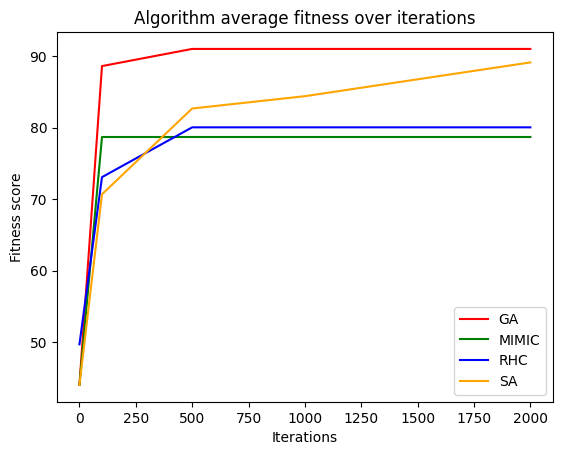

In [38]:
for algorithm, color in zip(compare_df_gb['Algorithm'].unique(), ['r', 'g', 'b', 'orange']):
    plt.plot(compare_df_gb[compare_df_gb['Algorithm']==algorithm]['Iteration'], compare_df_gb[compare_df_gb['Algorithm']==algorithm]['Fitness'], color, label=str(algorithm))

plt.xlabel("Iterations")
plt.ylabel("Fitness score")
plt.title('Algorithm average fitness over iterations')
plt.legend()
plt.show()

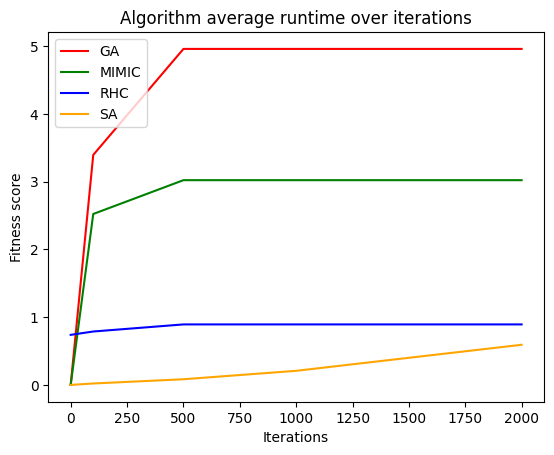

In [39]:
for algorithm, color in zip(compare_df_gb['Algorithm'].unique(), ['r', 'g', 'b', 'orange']):
    plt.plot(compare_df_gb[compare_df_gb['Algorithm']==algorithm]['Iteration'], compare_df_gb[compare_df_gb['Algorithm']==algorithm]['Time'], color, label=str(algorithm))

plt.xlabel("Iterations")
plt.ylabel("Fitness score")
plt.title('Algorithm average runtime over iterations')
plt.legend()
plt.show()